<a href="https://colab.research.google.com/github/rmonterof/Scikit-learn/blob/main/1_2_Regresi%C3%B3n_simple_salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal simple

Ejemplo con dataset salaries_experience.csv

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 110

## Obtención de los datos

In [23]:
df = pd.read_csv('/salaries_experience.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [24]:
df.shape

(30, 2)

In [25]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [26]:
X = df.iloc[:, :-1]
X[:10]

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [27]:
y = df.iloc[:, -1]
y[:10]

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [40]:
print(X_train[:10])
print(type(X_train))

    YearsExperience
28             10.3
24              8.7
12              4.0
0               1.1
4               2.2
16              5.1
5               2.9
13              4.1
11              4.0
22              7.9
<class 'pandas.core.frame.DataFrame'>


Text(0, 0.5, 'Salary')

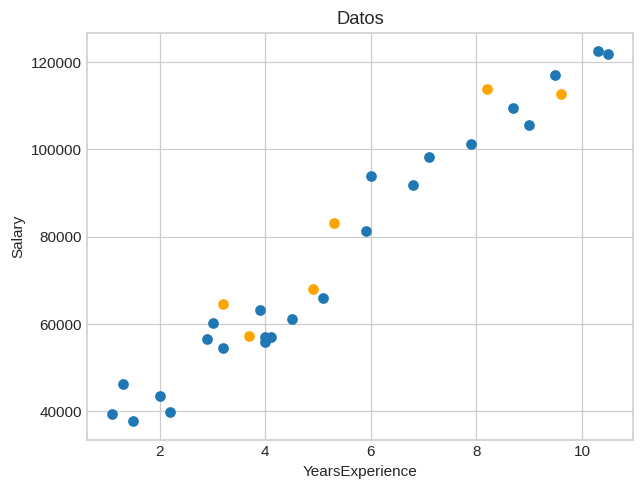

In [30]:
plt.scatter(X_test, y_test, c='orange')
plt.scatter(X_train, y_train)
plt.title('Datos')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

## Modelado

Regresión lineal simple: Esta es la forma más básica de regresión lineal en la que la variable que se va a predecir depende solo de otra variable. Esto se calcula usando la fórmula que generalmente se usa para calcular la pendiente de una línea.

y = w0 + w1*x1

En la ecuación anterior:

* y se refiere a la variable target
* x1 se refiere a la variable independiente
* w1 se refiere al coeficiente que expresa la relación entre y x1, también conocido como pendiente
* w0 es el coeficiente constante, también conocido como el intercept. Se refiere al desplazamiento constante que siempre tendrá y con respecto a las variables independientes.

In [31]:
model = LinearRegression()
model.fit(X_train, y_train) # conjunto de entrenamiento

LinearRegression()

In [32]:
y_pred = model.predict(X_test) # conjunto de validación, predice sobre datos que no conoce

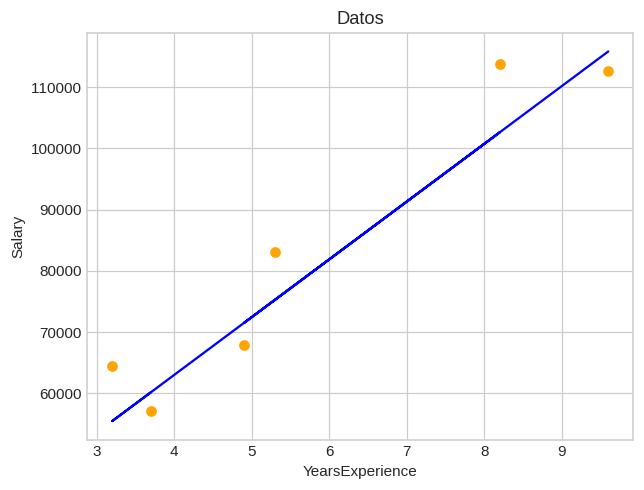

In [41]:
plt.scatter(X_test, y_test, c='orange')
plt.plot(X_test, y_pred, c='b') # predicciones
plt.title('Datos')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [42]:
model.predict([[9.2]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([112020.68398366])

In [44]:
X_new = pd.DataFrame({'YearsExperience':[9.2, 9.9]})
model.predict(X_new)

array([112020.68398366, 118617.35470978])

## Fórmula regresión lineal simple

In [36]:
model.coef_

array([9423.81532303])

In [37]:
model.intercept_

np.float64(25321.583011776813)

In [38]:
9.2 * model.coef_ + model.intercept_

array([112020.68398366])

In [39]:
9.9 * model.coef_ + model.intercept_

array([118617.35470978])